In [1]:
run /home/alec/galvanize/capstone/Forecasting_Walmart_Sales/src/script.py

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [3]:
def get_actuals(series_lst, periods_back):
    actuals = []
    for i in series_lst:
        if periods_back == 1:
            actuals.append(i[-1:].iloc[0,0])
        else:
            actuals.append(i[-periods_back:-1].iloc[0,0])
    return actuals

In [4]:
def calculate_errors(actual, forecast):
    return abs((actual-forecast)/actual)

In [233]:
def arima_forecast(store_ids, dept_ids, art_dict, holdout_periods, interval):
    lst_of_forecasts = []
    for _ in range(holdout_periods):
        lst_of_forecasts.append([]) 
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
    count = 0
    for idx,i in enumerate(series_lst):
        print(count)
        count += 1
        if idx == 68 or idx == 69:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
        elif len(i) <= 24:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
        else:
            train, test = train_test_split(i, train_size=len(i)-holdout_periods)
            model = pm.auto_arima(train, seasonal=True, m=12)
            forecasts = model.predict(test.shape[0]).tolist()
            for idx, val in enumerate(forecasts):
                lst_of_forecasts[idx].append(val)
    return lst_of_forecasts, series_lst

In [234]:
art_dict = {}
#art_dict[1] = resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]
art_dict[4] = resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]
#art_dict[8] = resample_series(make_series('CA_2', 'HOBBIES_2'),'M')[38:]
art_dict[12] = resample_series(make_series('CA_2', 'FOODS_2'),'M')[-13:] #added one bc I was getting an error, used to be [-6:]
#art_dict[13] = resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]
art_dict[15] = resample_series(make_series('CA_3', 'HOBBIES_2'),'M')[38:]
#art_dict[22] = resample_series(make_series('CA_4', 'HOBBIES_2'),'M')[38:]
art_dict[25] = resample_series(make_series('CA_4', 'FOODS_1'),'M')[16:]
#art_dict[29] = resample_series(make_series('TX_1', 'HOBBIES_2'),'M')[38:]
art_dict[30] = resample_series(make_series('TX_1', 'HOUSEHOLD_1'),'M')[16:]
art_dict[32] = resample_series(make_series('TX_1', 'FOODS_1'),'M')[14:]
art_dict[39] = resample_series(make_series('TX_2', 'FOODS_1'),'M')[46:]
#art_dict[40] = resample_series(make_series('TX_2', 'FOODS_2'),'M')[26:]
#art_dict[43] = resample_series(make_series('TX_3', 'HOBBIES_2'),'M')[46:]
#art_dict[44] = resample_series(make_series('TX_3', 'HOUSEHOLD_1'),'M')[26:]
#art_dict[46] = resample_series(make_series('TX_3', 'FOODS_1'),'M')[26:]
art_dict[50] = resample_series(make_series('WI_1', 'HOBBIES_2'),'M')[41:]
#art_dict[57] = resample_series(make_series('WI_2', 'HOBBIES_2'),'M')[26:]
art_dict[60] = resample_series(make_series('WI_2', 'FOODS_1'),'M')[16:]
#art_dict[66] = resample_series(make_series('WI_3', 'HOUSEHOLD_2'),'M')[40:]
art_dict[68] = resample_series(make_series('WI_3', 'FOODS_2'),'M')[34:]
art_dict[69] = resample_series(make_series('WI_3', 'FOODS_3'),'M')[26:]

In [236]:
#arima_forecasts6, series_lst6 = arima_forecast(store_id, dept_id, art_dict, 6, 'M')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [237]:
#SAVE THE LISTS AS NUMPY ARRAYS SO WE DON"T HAVE TO RUN AGAIN
#x = np.array(arima_forecasts6)
#np.save('arima_forecasts6_2', x)

In [238]:
x = np.load('arima_forecasts6_2.npy')
arima_forecasts6 = x.tolist()

In [239]:
#Can't save series_lst6 to a numpy array. Maybe write a separate function to get that if needed?
def make_series_list6(store_ids, dept_ids, art_dict, interval):
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
    return series_lst

series_lst6 = make_series_list6(store_id, dept_id, art_dict, 'M')

In [240]:
def get_6_month_errors(arima_forecasts6):
    arima6_oct = arima_forecasts6[0]
    arima6_nov = arima_forecasts6[1]
    arima6_dec = arima_forecasts6[2]
    arima6_jan = arima_forecasts6[3]
    arima6_feb = arima_forecasts6[4]
    arima6_mar = arima_forecasts6[5]

    oct_actuals = get_actuals(series_lst6, 6)
    nov_actuals = get_actuals(series_lst6, 5)
    dec_actuals = get_actuals(series_lst6, 4)
    jan_actuals = get_actuals(series_lst6, 3)
    feb_actuals = get_actuals(series_lst6, 2)
    mar_actuals = get_actuals(series_lst6, 1)

    arima6_oct_error = []
    for idx, val in enumerate(oct_actuals):
        arima6_oct_error.append(round(calculate_errors(val, arima6_oct[idx]), 2))

    arima6_nov_error = []
    for idx, val in enumerate(nov_actuals):
        arima6_nov_error.append(round(calculate_errors(val, arima6_nov[idx]), 2))

    arima6_dec_error = []
    for idx, val in enumerate(dec_actuals):
        arima6_dec_error.append(round(calculate_errors(val, arima6_dec[idx]), 2))

    arima6_jan_error = []
    for idx, val in enumerate(jan_actuals):
        arima6_jan_error.append(round(calculate_errors(val, arima6_jan[idx]), 2))

    arima6_feb_error = []
    for idx, val in enumerate(feb_actuals):
        arima6_feb_error.append(round(calculate_errors(val, arima6_feb[idx]), 2))

    arima6_mar_error = []
    for idx, val in enumerate(mar_actuals):
        arima6_mar_error.append(round(calculate_errors(val, arima6_mar[idx]), 2))

    arima6_oct_error = np.array(arima6_oct_error)
    arima6_nov_error = np.array(arima6_nov_error)
    arima6_dec_error = np.array(arima6_dec_error)
    arima6_jan_error = np.array(arima6_jan_error)
    arima6_feb_error = np.array(arima6_feb_error)
    arima6_mar_error = np.array(arima6_mar_error)
    return arima6_oct_error, arima6_nov_error, arima6_dec_error, arima6_jan_error, arima6_feb_error, arima6_mar_error

In [241]:
arima6_oct_error, arima6_nov_error, arima6_dec_error, arima6_jan_error, arima6_feb_error, arima6_mar_error = get_6_month_errors(arima_forecasts6)

In [177]:
count = 0
for idx, val in enumerate(series_setup(store_id, dept_id)):
    print(f'{count}: {val} Oct error: {round(arima6_oct_error[idx], 2)}, Nov error: {round(arima6_nov_error[idx], 2)}, Dec error: {round(arima6_dec_error[idx], 2)}, Jan error: {round(arima6_jan_error[idx], 2)}, Feb error: {round(arima6_feb_error[idx], 2)}, Mar error: {round(arima6_mar_error[idx], 2)}')
    count += 1

0: ['CA_1', 'HOBBIES_1'] Oct error: 0.01, Nov error: 0.02, Dec error: 0.04, Jan error: 0.02, Feb error: 0.11, Mar error: 0.09
1: ['CA_1', 'HOBBIES_2'] Oct error: 0.36, Nov error: 0.04, Dec error: 0.0, Jan error: 0.28, Feb error: 0.21, Mar error: 0.09
2: ['CA_1', 'HOUSEHOLD_1'] Oct error: 0.02, Nov error: 0.07, Dec error: 0.09, Jan error: 0.03, Feb error: 0.12, Mar error: 0.11
3: ['CA_1', 'HOUSEHOLD_2'] Oct error: 0.05, Nov error: 0.06, Dec error: 0.04, Jan error: 0.04, Feb error: 0.06, Mar error: 0.12
4: ['CA_1', 'FOODS_1'] Oct error: 0.06, Nov error: 0.34, Dec error: 0.06, Jan error: 0.12, Feb error: 0.12, Mar error: 0.01
5: ['CA_1', 'FOODS_2'] Oct error: 0.12, Nov error: 0.05, Dec error: 0.04, Jan error: 0.14, Feb error: 0.04, Mar error: 0.14
6: ['CA_1', 'FOODS_3'] Oct error: 0.05, Nov error: 0.13, Dec error: 0.21, Jan error: 0.06, Feb error: 0.07, Mar error: 0.02
7: ['CA_2', 'HOBBIES_1'] Oct error: 0.02, Nov error: 0.02, Dec error: 0.14, Jan error: 0.08, Feb error: 0.02, Mar error: 

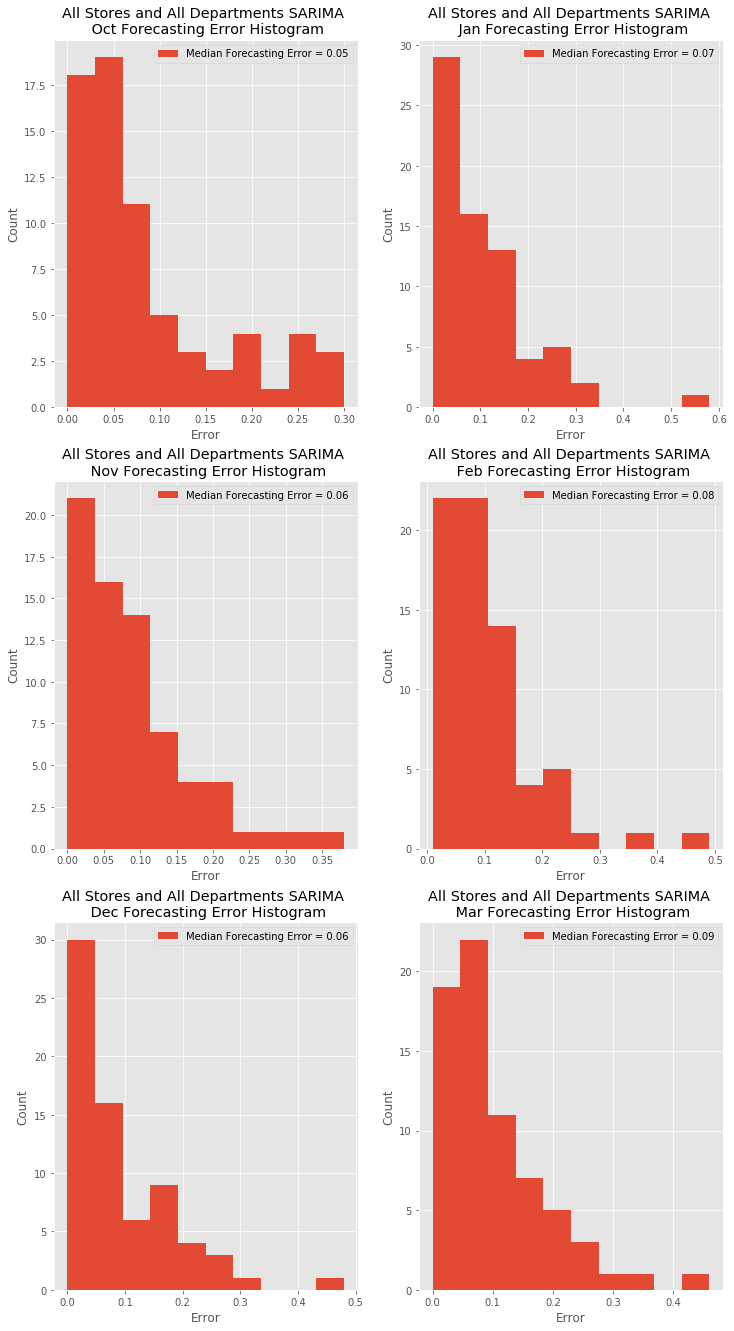

In [245]:
fig, axs = plt.subplots(3, 2, figsize = (12,23))
axs[0, 0].hist(arima6_oct_error, label = f'Median Forecasting Error = {round(np.median(arima6_oct_error),2)}')
axs[0, 0].set_title('All Stores and All Departments SARIMA \n Oct Forecasting Error Histogram')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlabel('Error')
axs[0, 0].legend()

axs[1, 0].hist(arima6_nov_error, label = f'Median Forecasting Error = {round(np.median(arima6_nov_error),2)}')
axs[1, 0].set_title('All Stores and All Departments SARIMA \n Nov Forecasting Error Histogram')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Error')
axs[1, 0].legend()

axs[2, 0].hist(arima6_dec_error, label = f'Median Forecasting Error = {round(np.median(arima6_dec_error),2)}')
axs[2, 0].set_title('All Stores and All Departments SARIMA \n Dec Forecasting Error Histogram')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_xlabel('Error')
axs[2, 0].legend()

axs[0, 1].hist(arima6_jan_error, label = f'Median Forecasting Error = {round(np.median(arima6_jan_error),2)}')
axs[0, 1].set_title('All Stores and All Departments SARIMA \n Jan Forecasting Error Histogram')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlabel('Error')
axs[0, 1].legend()

axs[1, 1].hist(arima6_feb_error, label = f'Median Forecasting Error = {round(np.median(arima6_feb_error),2)}')
axs[1, 1].set_title('All Stores and All Departments SARIMA \n Feb Forecasting Error Histogram')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Error')
axs[1, 1].legend()

axs[2, 1].hist(arima6_mar_error, label = f'Median Forecasting Error = {round(np.median(arima6_mar_error),2)}')
axs[2, 1].set_title('All Stores and All Departments SARIMA \n Mar Forecasting Error Histogram')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_xlabel('Error')
axs[2, 1].legend()

plt.savefig('../images/arima_hist')
plt.show()

In [232]:
series2 = resample_series(make_series('WI_3', 'FOODS_3'),'M')

train2, test2 = train_test_split(series2, train_size=len(series2)-6)
model2 = pm.auto_arima(train2, seasonal=True, m=12)
forecasts2 = model2.predict(test2.shape[0]).tolist()
#print(forecasts2)
#print(model2.summary())
actuals = []
periods_lst = [6,5,4,3,2,1]
for periods_back in periods_lst:
    if periods_back == 1:
        actuals.append(series2[-1:].iloc[0,0])
    else:
        actuals.append(series2[-periods_back:-1].iloc[0,0])
results = []
for idx, val in enumerate(forecasts2):
    results.append(calculate_errors(actuals[idx], val))
results

[0.03443701581237398,
 0.04294748103853428,
 0.09717421014551009,
 0.04619550974054337,
 0.07936320555845995,
 0.11782101418829385]

In [216]:
count = 0
for i in series_lst6:
    print(f'idx {count}: length {len(i)}')
    count += 1

idx 0: length 62
idx 1: length 18
idx 2: length 62
idx 3: length 62
idx 4: length 40
idx 5: length 62
idx 6: length 62
idx 7: length 62
idx 8: length 24
idx 9: length 62
idx 10: length 62
idx 11: length 62
idx 12: length 13
idx 13: length 9
idx 14: length 62
idx 15: length 24
idx 16: length 62
idx 17: length 62
idx 18: length 62
idx 19: length 62
idx 20: length 62
idx 21: length 62
idx 22: length 24
idx 23: length 62
idx 24: length 62
idx 25: length 46
idx 26: length 62
idx 27: length 62
idx 28: length 62
idx 29: length 62
idx 30: length 46
idx 31: length 62
idx 32: length 48
idx 33: length 62
idx 34: length 62
idx 35: length 62
idx 36: length 62
idx 37: length 62
idx 38: length 62
idx 39: length 16
idx 40: length 36
idx 41: length 62
idx 42: length 62
idx 43: length 16
idx 44: length 36
idx 45: length 62
idx 46: length 36
idx 47: length 62
idx 48: length 62
idx 49: length 62
idx 50: length 21
idx 51: length 62
idx 52: length 62
idx 53: length 62
idx 54: length 62
idx 55: length 62
idx

In [243]:
lst_of_stores = series_setup(store_id, dept_id)

def updated_six_period_plot_forecast_vs_arima(idx):
    series = series_lst6[idx]
    if idx == 68 or idx == 69:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True)
        forecasts = model.predict(test.shape[0]).tolist()

    elif len(series) <= 24:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True)
        forecasts = model.predict(test.shape[0]).tolist()

    else:
        train, test = train_test_split(series, train_size=len(series)-6)
        model = pm.auto_arima(train, seasonal=True, m=12)
        forecasts = model.predict(test.shape[0]).tolist()
    
    print(model.summary())
    fig, ax = plt.subplots(figsize = (18, 12))
    ax.plot(train.index, train, label = 'Historical Sales Used for Forecast')
    ax.plot(test.index, forecasts, label = 'Forecasted Sales')
    ax.plot(series[-6:].index, series[-6:], label = 'Actual Sales')
    ax.axvline(x = series[-6:].index[0], color='k', linestyle='--', label = 'End of Historical Sales')
    ax.set_title(f'Comparison of Actual vs Forecasted Sales \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')
    ax.legend(fontsize = 12)
    plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   56
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -439.823
Date:                             Wed, 03 Jun 2020   AIC                            889.646
Time:                                     16:32:53   BIC                            899.683
Sample:                                          0   HQIC                           893.527
                                              - 56                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.3378     49.490      0.997      0.319     -47.661     146.337
ma.L1         -0.5145      

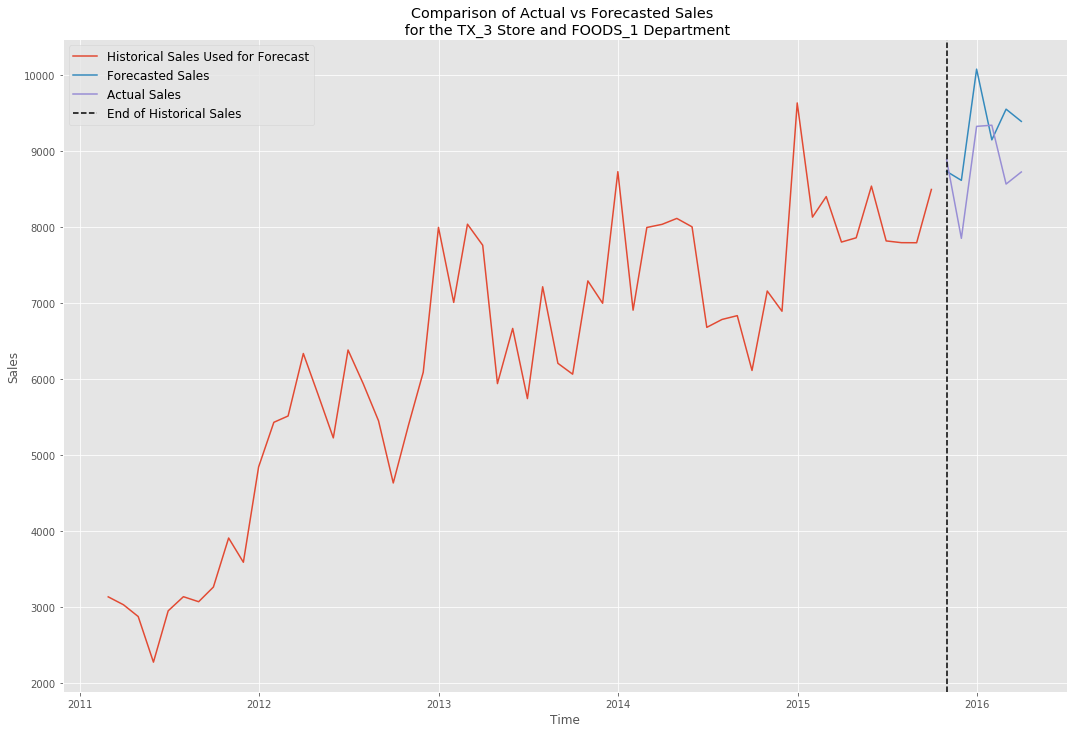

In [244]:
updated_six_period_plot_forecast_vs_arima(46)

In [81]:
test_series_lst = []
for series in series_setup(store_id, dept_id):
    test_series_lst.append(resample_series(make_series(series[0], series[1]), 'M'))

In [82]:
train1_lst = []
test1_lst = []
for i in test_series_lst:
    train, test = train_test_split(i, train_size=len(i)-6)
    train1_lst.append(train)
    test1_lst.append(test)

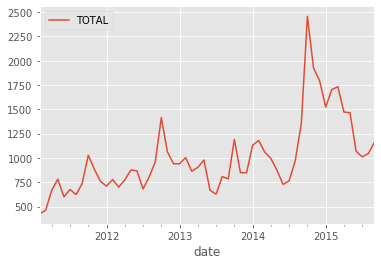

In [224]:
train1_lst[43].plot()

,TOTAL
date,
2011-12-31,10934
2012-01-31,11589
2012-02-29,13167
2012-03-31,13794
2012-04-30,13787


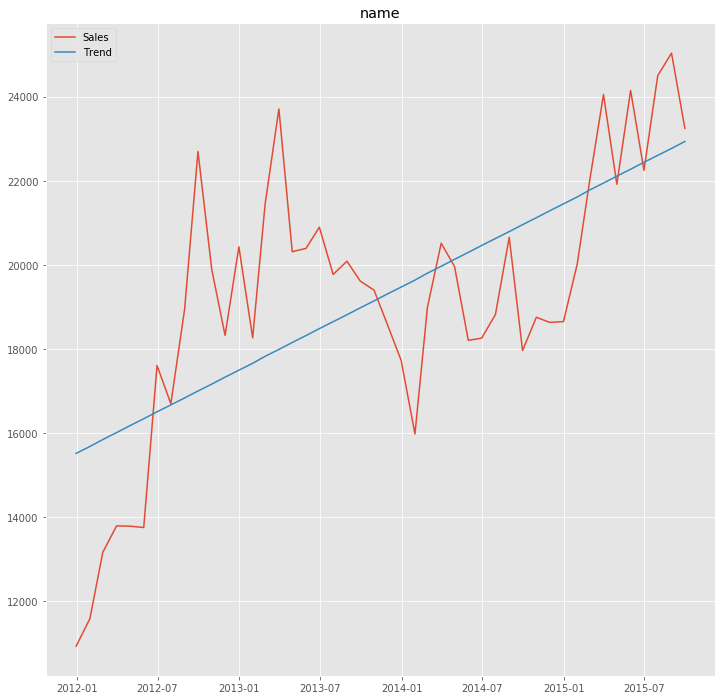

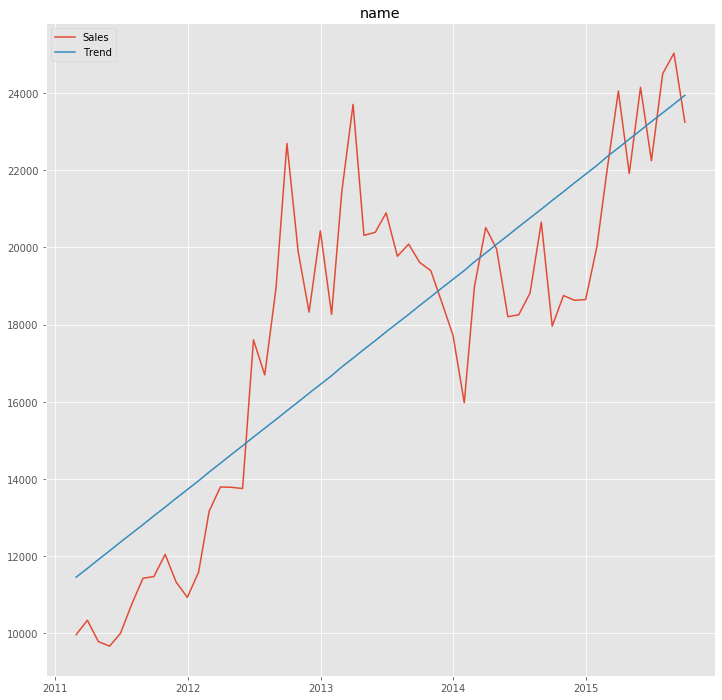

In [117]:
idx =30
row = 16
fig, ax = plt.subplots(figsize = (12,12))
plot_linear_trend(ax, 'name', train1_lst[idx][row-6:])

fig, ax = plt.subplots(figsize = (12,12))
plot_linear_trend(ax, 'name', train1_lst[idx])
train1_lst[idx][row-6:].head()

In [122]:
sm.tsa.stattools.adfuller(art_dict[30].diff()[1:])[1]

5.80673975384114e-13

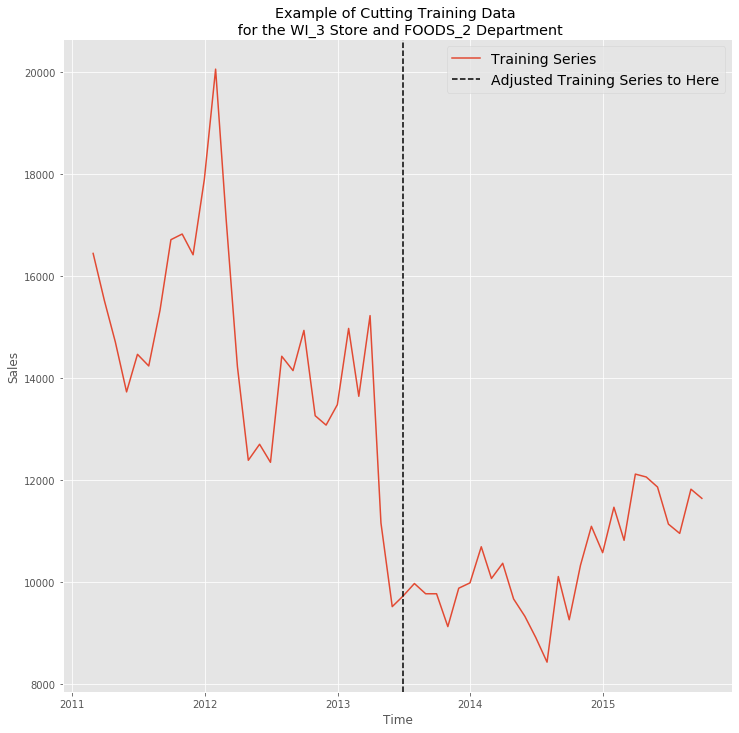

In [168]:
lst_of_stores = series_setup(store_id, dept_id)
idx = 68
row = 34

fig, ax = plt.subplots(figsize = (12,12))
ax.plot(train1_lst[idx], label = 'Training Series')
ax.axvline(x = train1_lst[idx][row-6:].index[0], color='k', linestyle='--', label = 'Adjusted Training Series to Here')
ax.set_title(f'Example of Cutting Training Data \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend(fontsize = 14)
plt.show()